In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from keras.datasets import fashion_mnist

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 23s 5us/step


In [4]:
x_train[999].shape

(28, 28)

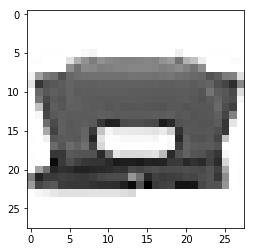

In [5]:
plt.imshow(x_train[999], cmap='Greys')

In [6]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [7]:
x_train[1000].shape

(28, 28, 1)

In [8]:
from keras.utils import np_utils

In [9]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [10]:
y_train[1234]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [11]:
x_train = x_train/255
x_test = x_test/255

* 2 次 conv, 2 次 max
* 2 Dense
* output: 10

filter 大小 3x3
maxpooling 2x2

* Conv01: 16
* Conv02: 32

fully connect

* 128

In [70]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import SGD

In [71]:
model = Sequential()

In [72]:
model.add(Conv2D(16, (3, 3), padding='same', input_shape=(28, 28, 1), activation='relu'))

In [73]:
model.add(MaxPool2D(pool_size=(2,2)))

In [74]:
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(28, 28, 1), activation='relu'))

In [75]:
model.add(MaxPool2D(pool_size=(2,2)))

In [76]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))

In [77]:
model.add(Dense(10, activation = 'softmax'))

In [78]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [79]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               200832    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1290      
Total para

In [81]:
model.fit(x_train, y_train, batch_size=300, epochs=15)

Epoch 1/15
60000/60000 [==============================] - 12s 205us/step - loss: 0.0216 - acc: 0.8509
Epoch 2/15
60000/60000 [==============================] - 12s 200us/step - loss: 0.0182 - acc: 0.8761
Epoch 3/15
60000/60000 [==============================] - 12s 205us/step - loss: 0.0162 - acc: 0.8901
Epoch 4/15
60000/60000 [==============================] - 12s 201us/step - loss: 0.0152 - acc: 0.8971
Epoch 5/15
60000/60000 [==============================] - 12s 200us/step - loss: 0.0142 - acc: 0.9039
Epoch 6/15
60000/60000 [==============================] - 12s 201us/step - loss: 0.0135 - acc: 0.9099
Epoch 7/15
60000/60000 [==============================] - 12s 200us/step - loss: 0.0129 - acc: 0.9133
Epoch 8/15
60000/60000 [==============================] - 12s 201us/step - loss: 0.0124 - acc: 0.9164
Epoch 9/15
60000/60000 [==============================] - 12s 201us/step - loss: 0.0118 - acc: 0.9200
Epoch 10/15
60000/60000 [==============================] - 12s 206us/step - loss: 

In [82]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 144us/step


In [83]:
print('loss:', score[0])
print('正確率', score[1])

loss: 0.013619569595716894
正確率 0.9075


In [89]:
from ipywidgets import interact_manual

In [90]:
predict = model.predict_classes(x_test)

In [91]:
labelNames = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt','sneaker', 'bag', 'ankle boot']

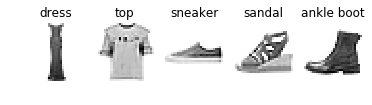

In [93]:
pick = np.random.randint(1, 9999, 5)

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[pick[i]].reshape(28, 28), cmap='Greys')
    plt.title(labelNames[predict[pick[i]]])
    plt.axis('off')